In [1]:
from pandas import read_csv, DataFrame
import pandas as pd
import numpy as np


#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase

filepath=r'dataset/df_msg_encoded.csv'

file_tag = 'df_msg_MV'

# Load

In [2]:
# test_data=True
test_data=False

if test_data==True:

    data=pd.read_csv(filepath)

    # 1% sample
    data=data.sample(frac=0.01, replace=False)
    

else:
    data=pd.read_csv(filepath)
    # 50% sample
    #data=data.sample(frac=0.15, replace=False)

 
target='is_clicked'

# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True) 

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195562 entries, 0 to 195561
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   platform                      91235 non-null   float64
 1   email_provider                120277 non-null  float64
 2   is_clicked                    195562 non-null  float64
 3   campaign_type                 195562 non-null  float64
 4   channel_cmp                   195562 non-null  float64
 5   topic                         193912 non-null  float64
 6   total_count                   148530 non-null  float64
 7   subject_length                162800 non-null  float64
 8   subject_with_personalization  162800 non-null  float64
 9   subject_with_deadline         162800 non-null  float64
 10  subject_with_emoji            162800 non-null  float64
 11  subject_with_bonuses          162800 non-null  float64
 12  subject_with_discount         162800 non-null  fl

# DSLabs functions

In [3]:
%run "scripts/dslabs_functions.py"

In [4]:
%run "scripts/data_functions.py"

data_functions lodaded


In [5]:
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, show
#from dslabs_functions import plot_bar_chart

# MV Analysis

Variables with their respective percentages of missing values:
platform: 53.35%
email_provider: 38.50%
total_count: 24.05%
subject_length: 16.75%
subject_with_personalization: 16.75%
subject_with_deadline: 16.75%
subject_with_emoji: 16.75%
subject_with_bonuses: 16.75%
subject_with_discount: 16.75%
subject_with_saleout: 16.75%
topic: 0.84%


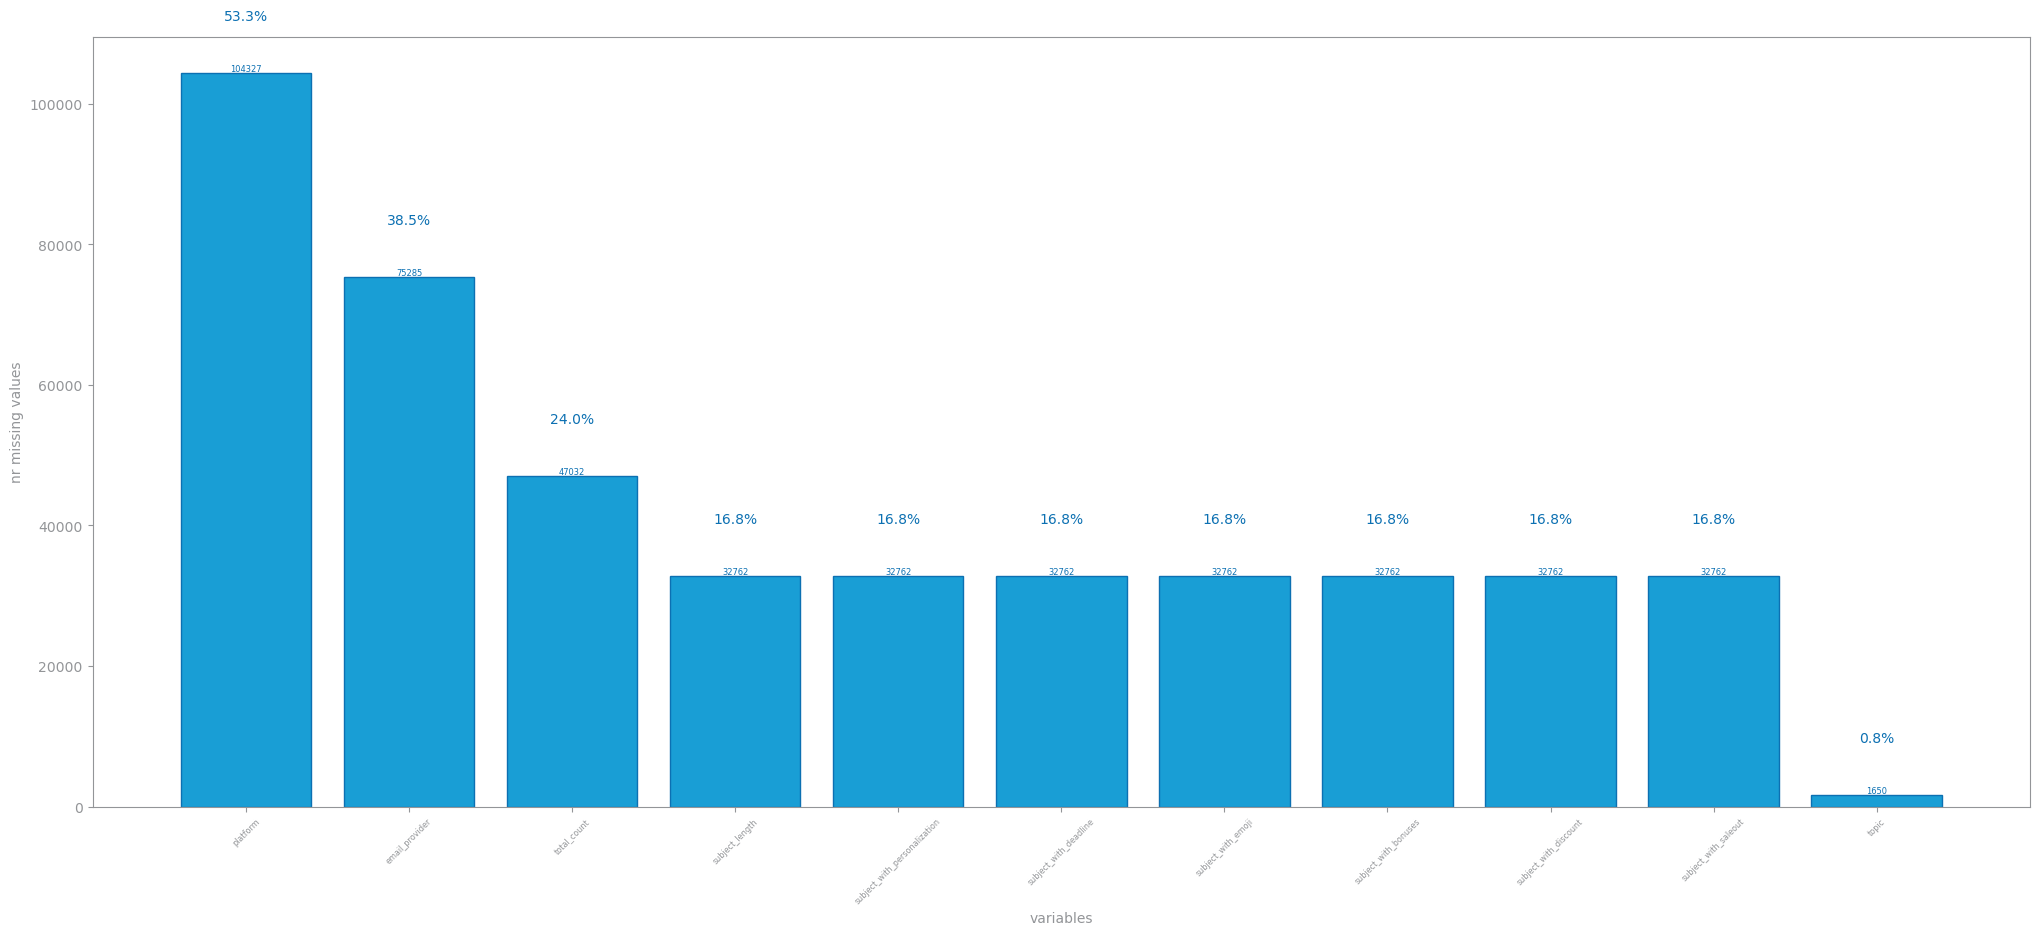

In [6]:
mv: dict[str, int] = {}
total_rows = len(data)

# Calculate the number of missing values and percentage for each variable
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

# Sort the dictionary by the number of missing values in descending order
sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

# Print the list of variables with their respective percentages of missing values
print("Variables with their respective percentages of missing values:")
for var, perc in zip(variables, percentages):
    print(f"{var}: {perc:.2f}%")

# Plotting the bar chart
figure(figsize=(25, 10))  # (width, height)

plot_bar_chart(
    variables,
    missing_values,
    xlabel="variables",
    ylabel="nr missing values",
)

# Annotate the bars with percentages
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

# Display the chart
show()


In [7]:
#data = data.drop(columns=['days_diff_complained_at_sent_at','days_diff_purchased_at_sent_at', "platform", "email_provider",
#                            "days_diff_clicked_first_time_at_sent_at",
#                           "days_diff_opened_first_time_at_sent_at", "days_diff_first_purchase_date_sent_at"])

106085 rows

In [8]:
data.shape[0]

195562

In [9]:
data.columns

Index(['platform', 'email_provider', 'is_clicked', 'campaign_type',
       'channel_cmp', 'topic', 'total_count', 'subject_length',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'day_of_year', 'is_weekend', 'month',
       'time_of_day', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_sin', 'week_of_month_cos'],
      dtype='object')

# Strategies

Recall is important when you are looking at minimizing the number of false negatives. For example, let’s assume you are using the model to select customers for an email campaign. You would want to maximize the number of customers the model correctly predicts to purchase the product and you would want to only target customers who will be interested in purchasing the product. In this case, recall is a more appropriate evaluation metric

# MV 1 - Most Frequent Srategy

## MV1 strategy apply

In [10]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling

# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_1(df):

    data_copy=data.copy()
    data_copy = mvi_by_filling(data_copy, strategy="frequent")

    return data_copy

data_1=apply_strategy_1(data)
data_1.describe()


,platform,email_provider,campaign_type,channel_cmp,topic,total_count,subject_length,day_of_year,month,hour_sin,...,week_of_month_cos,is_clicked,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_weekend,time_of_day
count,195562.000000,195562.000000,195562.000000,195562.000000,195562.000000,1.955620e+05,195562.000000,195562.000000,195562.000000,195562.000000,...,195562.000000,195562.000000,195562.000000,195562.000000,195562.00000,195562.000000,195562.000000,195562.000000,195562.000000,195562.00000
mean,2.315131,1.753028,0.408024,1.217440,13.127218,6.166253e+05,111.685307,138.209366,1.054898,0.637947,...,-0.031494,0.126650,0.001468,0.031596,0.94412,0.017089,0.004336,0.026462,0.072734,0.10232
std,0.853895,3.630298,0.759341,0.710786,4.006549,3.231069e+05,18.560894,12.213370,0.524333,0.440841,...,0.534630,0.332582,0.038281,0.174923,0.22969,0.129604,0.065707,0.160506,0.259700,0.30307
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,32.000000,120.000000,0.000000,-0.942000,...,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.315131,1.000000,0.000000,1.000000,15.000000,2.830630e+05,97.000000,126.000000,1.000000,0.631000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.315131,1.753028,0.000000,1.000000,15.000000,6.166253e+05,111.685307,140.000000,1.000000,0.817000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,3.000000,1.753028,0.000000,2.000000,15.000000,9.218380e+05,133.000000,146.000000,1.000000,0.942000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000
max,3.000000,187.000000,2.000000,2.000000,17.000000,1.045217e+06,185.000000,165.000000,2.000000,0.998000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


In [11]:
data_1.columns

Index(['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic',
       'total_count', 'subject_length', 'day_of_year', 'month', 'hour_sin',
       'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin',
       'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_sin', 'week_of_month_cos', 'is_clicked',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'is_weekend', 'time_of_day'],
      dtype='object')

## MV1 train/test split 

Labels=[0.0, 1.0]


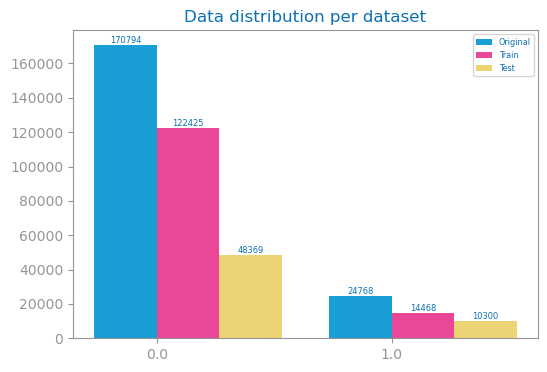

In [12]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
#from dslabs_functions import plot_multibar_chart
from numpy import array, ndarray


y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)


# Call the function to split the data
train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)

# Distribution check
values["Train"] = [
    len(train_1[train_1[target] == 0]),
    len(train_1[train_1[target] == 1]),
]
values["Test"] = [
    len(test_1[test_1[target] == 0]),
    len(test_1[test_1[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

In [13]:
data_1.shape[0]

195562

## MV1 evaluate

<Figure size 640x480 with 0 Axes>

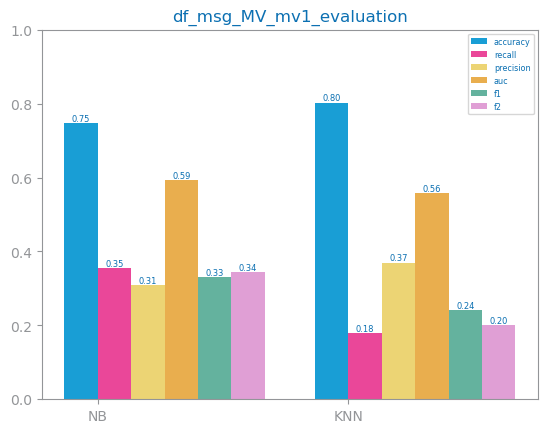

In [14]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
#from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN

figure()
eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_clicked', metric="recall")

if not eval_1 or all(len(values) == 0 for values in eval_1.values()):
    print("No data available to plot. Please check the input data.")
else:
    figure()
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_mv1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_mv1_evaluation.png")
    show()

In [15]:
print("Evaluation data:", eval_1)


Evaluation data: {'accuracy': [0.746799843188055, 0.8023146806661099], 'recall': [0.35436893203883496, 0.1792233009708738], 'precision': [0.3078869675242514, 0.36993987975951903], 'auc': [0.5923677445655937, 0.5571114954274452], 'f1': [0.329496727600993, 0.24146500981033356], 'f2': [0.343982659504288, 0.19982680233816844]}


# MV2 - drop null strategy - columns

1. Remove 7 variables due to high % of null values. Also, since we are not sure of its quality it makes more sense to remove it altogether without sacrificing the number of rows
2. Remove remaining null values records 

## MV2 strategy apply

In [16]:
# numeric_vars: list[str] = get_variable_types(data)["numeric"]

def apply_strategy_2(df):

    df_copy=df.copy()

    df_copy = df_copy.dropna(axis=1, how="any") #axis=1, drop columns that contain any missing values.

    return df_copy

data_2=apply_strategy_2(data)

## MV2 target prep

In [17]:
y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)


Labels=[0.0, 1.0]


## MV2 train/test split 

<Axes: title={'center': 'Data distribution per dataset'}>

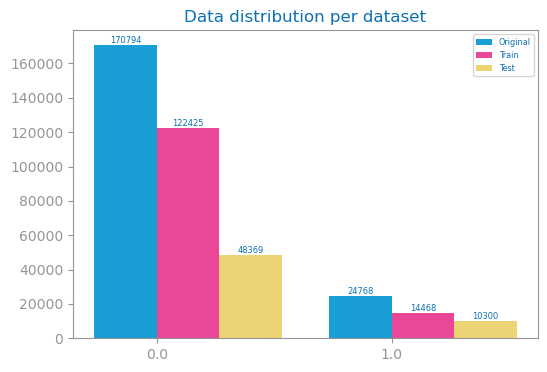

In [18]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
#from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data
train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


values["Train"] = [
    len(train_2[train_2[target] == 0]),
    len(train_2[train_2[target] == 1]),
]
values["Test"] = [
    len(test_2[test_2[target] == 0]),
    len(test_2[test_2[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## MV2 evaluate

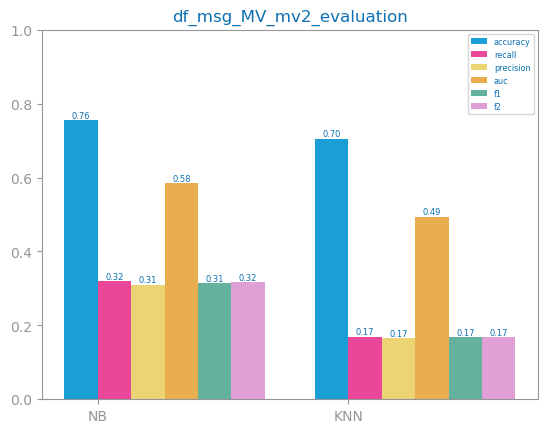

In [19]:

figure()
eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_clicked', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval_2, title=f"{file_tag}_mv2_evaluation", percentage=True
)
savefig(f"images/{file_tag}mv2_evaluation.png")
show()

# MV3 - drop null strategy - rows

1. Remove 7 variables due to high % of null values. Also, since we are not sure of its quality it makes more sense to remove it altogether without sacrificing the number of rows
2. Remove remaining null values records 

## MV3 strategy apply

In [20]:
# numeric_vars: list[str] = get_variable_types(data)["numeric"]

def apply_strategy_3(df):

    df_copy=df.copy()
    df_copy = df_copy.dropna(axis=0, how="any") #axis=0 tells dropna to remove rows that have at least one NaN value.

    return df_copy

data_3=apply_strategy_3(data)

## MV3 target prep

In [21]:
y_3, X_3, labels, class_counts = define_target_and_prepare_data(data_3, target=target)


Labels=[0.0, 1.0]


## MV3 train/test split 

<Axes: title={'center': 'Data distribution per dataset'}>

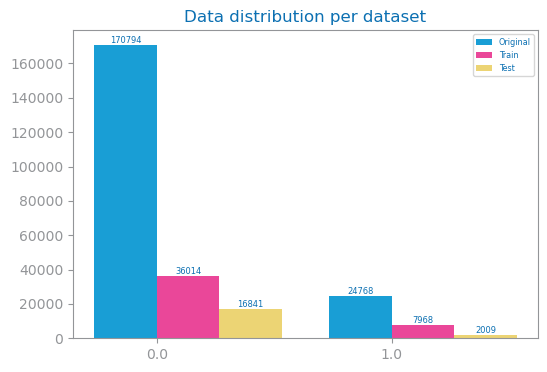

In [22]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
#from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data
train_3, test_3 = split_data_save_csv(pd.DataFrame(X_3, columns=data_3.columns), y_3, data_columns=data_3.columns, target_column=target)


values["Train"] = [
    len(train_3[train_3[target] == 0]),
    len(train_3[train_3[target] == 1]),
]
values["Test"] = [
    len(test_3[test_3[target] == 0]),
    len(test_3[test_3[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## MV3 evaluate

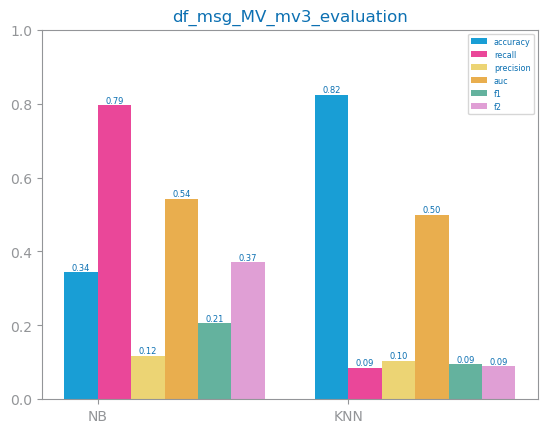

In [23]:

figure()
eval_3: dict[str, list] = evaluate_approach(train_3, test_3, target='is_clicked', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval_3, title=f"{file_tag}_mv3_evaluation", percentage=True
)
savefig(f"images/{file_tag}mv3_evaluation.png")
show()

In [24]:
data_3.shape[0]

62832

# MV4 - knn strategy

## MV4 strategy apply
haven't been able to run it. very computationally heavy and takes way too long 1h++

In [25]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
#from dslabs_functions import get_variable_types, mvi_by_filling

# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_4(df):

    data_copy=data.copy()
    data_copy = mvi_by_filling(data_copy, strategy="knn")

    return data_copy

data_4=apply_strategy_4(data)
data_4.describe()


,platform,email_provider,is_clicked,campaign_type,channel_cmp,topic,total_count,subject_length,subject_with_personalization,subject_with_deadline,...,hour_sin,hour_cos,min_sin,min_cos,day_of_month_sin,day_of_month_cos,day_of_week_nr_sin,day_of_week_nr_cos,week_of_month_sin,week_of_month_cos
count,195562.000000,195562.000000,195562.000000,195562.000000,195562.000000,195562.000000,1.955620e+05,195562.000000,195562.000000,195562.000000,...,195562.000000,195562.000000,195562.000000,195562.000000,195562.000000,195562.000000,195562.000000,195562.000000,195562.000000,195562.000000
mean,2.226031,1.519850,0.126650,0.408024,1.217440,13.088262,5.176809e+05,112.702241,0.001468,0.032600,...,0.637947,-0.560409,0.001608,-0.078522,-0.007863,0.044449,-0.163571,-0.395338,0.125377,-0.031494
std,1.008520,3.651706,0.332582,0.759341,0.710786,4.029225,3.933549e+05,20.045944,0.038281,0.177104,...,0.440841,0.291066,0.690794,0.718804,0.772670,0.633278,0.626387,0.651592,0.835143,0.534630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,32.000000,0.000000,0.000000,...,-0.942000,-0.991000,-1.000000,-0.999000,-0.999000,-0.995000,-0.866000,-1.000000,-1.000000,-1.000000
25%,1.800000,1.000000,0.000000,0.000000,1.000000,15.000000,1.351060e+05,97.000000,0.000000,0.000000,...,0.631000,-0.776000,-0.716000,-0.770000,-0.849000,-0.440000,-0.866000,-1.000000,-1.000000,0.000000
50%,2.600000,1.000000,0.000000,0.000000,1.000000,15.000000,6.518590e+05,109.000000,0.000000,0.000000,...,0.817000,-0.577000,0.000000,-0.237000,-0.201000,0.151000,-0.000000,-0.500000,0.000000,0.000000
75%,3.000000,1.400000,0.000000,0.000000,2.000000,15.000000,9.218380e+05,133.000000,0.000000,0.000000,...,0.942000,-0.335000,0.678000,0.659000,0.898000,0.689000,0.000000,-0.500000,1.000000,0.000000
max,3.000000,187.000000,1.000000,2.000000,2.000000,17.000000,1.045217e+06,185.000000,1.000000,1.000000,...,0.998000,0.203000,1.000000,1.000000,0.999000,1.000000,0.866000,1.000000,1.000000,1.000000


## MV4 train/test split 

Labels=[0.0, 1.0]


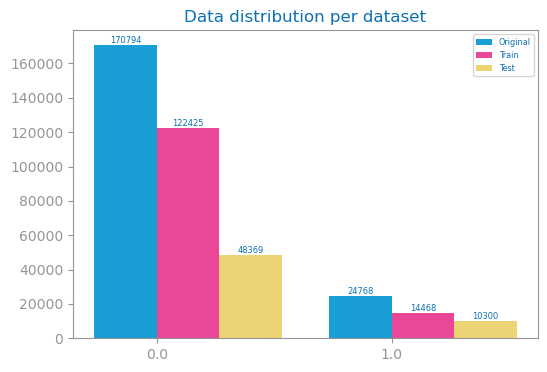

In [26]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
#from dslabs_functions import plot_multibar_chart
from numpy import array, ndarray


y_4, X_4, labels, values = define_target_and_prepare_data(data_4, target)


# Call the function to split the data
train_4, test_4 = split_data_save_csv(pd.DataFrame(X_4, columns=data_4.columns), y_4, data_columns=data_4.columns, target_column=target)

# Distribution check
values["Train"] = [
    len(train_4[train_4[target] == 0]),
    len(train_4[train_4[target] == 1]),
]
values["Test"] = [
    len(test_4[test_4[target] == 0]),
    len(test_4[test_4[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

## MV4 evaluate

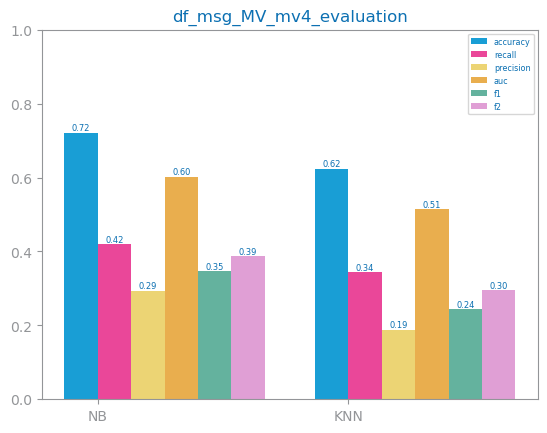

In [27]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
#from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN

figure()
eval_4: dict[str, list] = evaluate_approach(train_4, test_4, target='is_clicked', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval_4, title=f"{file_tag}_mv4_evaluation", percentage=True
)
savefig(f"images/{file_tag}_mv4_evaluation.png")
show()

# Approach uplift comparison

## uplift df

In [28]:
algorithms = ['Naive Bayes', 'KNN']

# Create DataFrames for eval_1 and eval_2
df_eval_3 = pd.DataFrame(eval_3, index=algorithms)
df_eval_4 = pd.DataFrame(eval_4, index=algorithms)

# Calculate uplift
df_uplift = df_eval_3 - df_eval_4

# Combine everything into one DataFrame (without misalignment issues)
comparison_df = pd.concat([df_eval_3, df_eval_4, df_uplift], axis=1)
comparison_df.columns = pd.MultiIndex.from_product([['Approach 3', 'Approach 4', 'Uplift'], eval_1.keys()])

# Display the DataFrame
comparison_df

Approach 3                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.344721  0.794923  0.117973  0.542969  0.205455  0.370139   
KNN           0.824562  0.085615  0.104750  0.499164  0.094221  0.088861   

            Approach 4                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.721096  0.420000  0.293986  0.602607  0.345872  0.386837   
KNN           0.623975  0.344078  0.188021  0.513828  0.243164  0.295092   

               Uplift                                                    
             accuracy    recall precision       auc        f1        f2  
Naive Bayes -0.376375  0.374923 -0.176013 -0.059637 -0.140418 -0.016699  
KNN          0.200587 -0.258463 -0.083270 -0.014664 -0.148944 -0.206231

# Analysis

- melhorou um pouco de tudo excepto a precision
- por isso devo avançar com a estratégia do strategy 1 most frequent (onde tenho um pouco menos recall mas mais precision)
- já que o recall já vou ter "elevado" no resto dos steps

# save to csv

In [32]:
if test_data==False:
    
    data=apply_strategy_1(data)
    
    data.to_csv(f"dataset/df_msg_mv_input.csv", index=False)
    

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195562 entries, 0 to 195561
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   platform                      195562 non-null  float64
 1   email_provider                195562 non-null  float64
 2   campaign_type                 195562 non-null  float64
 3   channel_cmp                   195562 non-null  float64
 4   topic                         195562 non-null  float64
 5   total_count                   195562 non-null  float64
 6   subject_length                195562 non-null  float64
 7   subject_with_deadline         195562 non-null  float64
 8   subject_with_emoji            195562 non-null  float64
 9   subject_with_bonuses          195562 non-null  float64
 10  subject_with_discount         195562 non-null  float64
 11  subject_with_saleout          195562 non-null  float64
 12  day_of_year                   195562 non-nul

In [34]:
data.shape[0]

195562